In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file
file_path = "Data Analyst Intern Assignment - Excel.xlsx"

In [3]:
sheet_names = pd.ExcelFile("Data Analyst Intern Assignment - Excel.xlsx").sheet_names
print("Sheet Names:", sheet_names)

Sheet Names: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


In [4]:
user_details = pd.read_excel(file_path, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(file_path, sheet_name="OrderDetails.csv")

In [5]:
print("User Details Data:")
print(user_details.head())

User Details Data:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  


In [6]:
print("Cooking Sessions Data:")
print(cooking_sessions.head())

Cooking Sessions Data:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [7]:
print("Order Details Data:")
print(order_details.head())

Order Details Data:
   Order ID User ID Order Date  Meal Type        Dish Name Order Status  \
0      1001    U001 2024-12-01     Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01      Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02     Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02  Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03      Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  
0          15.0       Night     5.0       S001  
1          10.0         Day     4.0       S002  
2          12.5       Night     NaN       S003  
3           8.0     Morning     4.0       S004  
4           9.0         Day     4.0       S005  


# Data cleaning

In [8]:
user_details.fillna("Unknown", inplace=True)
cooking_sessions.drop_duplicates(inplace=True)

In [9]:
user_details.columns = user_details.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
user_details['age'].fillna(user_details['age'].median(), inplace=True)  # Replace with median
user_details['location'].fillna('Unknown', inplace=True)  # Replace with a default value

# Merge Datasets

In [11]:
# Clean column names for all datasets
user_details.columns = user_details.columns.str.strip().str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.strip().str.lower().str.replace(' ', '_')

# Display column names after cleaning
print(user_details.columns)
print(cooking_sessions.columns)
print(order_details.columns)

Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')
Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')


In [12]:
merged_data = pd.merge(user_details, cooking_sessions, on='user_id', how='inner')
merged_data = pd.merge(merged_data, order_details, on='user_id', how='inner')

print(merged_data.head())

  user_id      user_name  age  location registration_date         phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   

             email favorite_meal  total_orders session_id_x  ...  \
0  alice@email.com        Dinner            12         S001  ...   
1  alice@email.com        Dinner            12         S001  ...   
2  alice@email.com        Dinner            12         S001  ...   
3  alice@email.com        Dinner            12         S004  ...   
4  alice@email.com        Dinner            12         S004  ...   

  session_rating order_id order_date meal_type_y      dish_name_y  \
0            4.5     1001 2024-12-01      Dinner        Spaghetti   
1 

#  Analyze Data
1. Analyze Relationships

In [13]:
#Total orders by city
orders_by_location = merged_data.groupby('location')['order_id'].count()
print(orders_by_location)

location
Austin           1
Boston           1
Chicago          9
Los Angeles      9
Miami            1
New York         9
San Francisco    4
Seattle          4
Name: order_id, dtype: int64


In [14]:
print(merged_data.columns)

Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders', 'session_id_x', 'dish_name_x',
       'meal_type_x', 'session_start', 'session_end', 'duration_(mins)',
       'session_rating', 'order_id', 'order_date', 'meal_type_y',
       'dish_name_y', 'order_status', 'amount_(usd)', 'time_of_day', 'rating',
       'session_id_y'],
      dtype='object')


In [15]:
# Inspect dish_name columns
print(merged_data[['dish_name_x', 'dish_name_y']].head(10))

# Use the relevant column
popular_dishes = merged_data['dish_name_x'].value_counts().head(10)
print(popular_dishes)

# Optional: Rename for clarity
merged_data.rename(columns={'dish_name_x': 'dish_name'}, inplace=True)

# Optional: Drop unnecessary columns
merged_data.drop(columns=['dish_name_y'], inplace=True)

# Recheck and finalize
print(merged_data.head())

       dish_name_x      dish_name_y
0        Spaghetti        Spaghetti
1        Spaghetti         Pancakes
2        Spaghetti  Grilled Chicken
3         Pancakes        Spaghetti
4         Pancakes         Pancakes
5         Pancakes  Grilled Chicken
6  Grilled Chicken        Spaghetti
7  Grilled Chicken         Pancakes
8  Grilled Chicken  Grilled Chicken
9     Caesar Salad     Caesar Salad
dish_name_x
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64
  user_id      user_name  age  location registration_date         phone  \
0    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
3    U001  Alice Johnson   28  New York        2023-01-15  123-456-7890   
4    U001  Alice Johnson   28  New York        2023-01-15  123-45

# Visualize Data

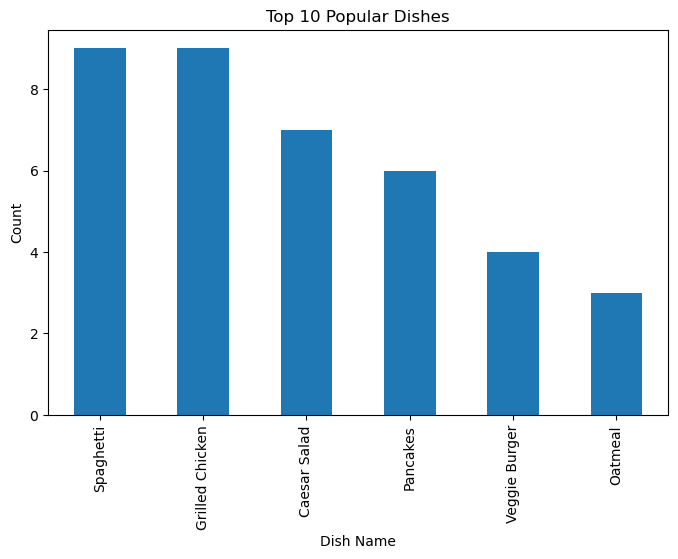

In [17]:
#(Top Dishes):
popular_dishes.plot(kind='bar', figsize=(8, 5))
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Count')
plt.show()

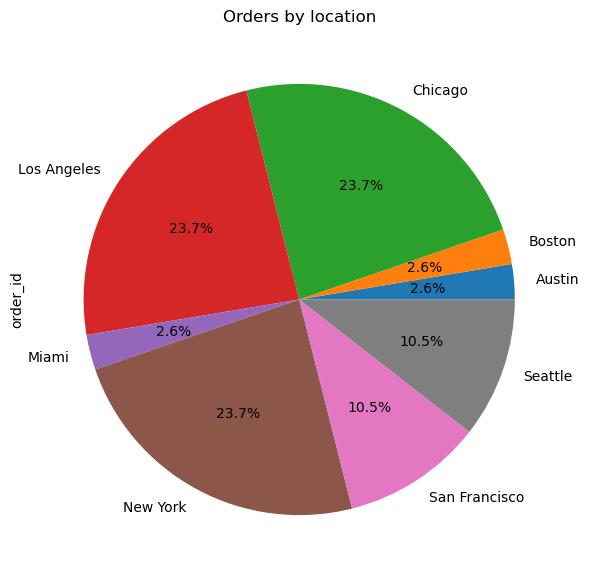

In [19]:
# Orders by City
orders_by_location.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Orders by location')
plt.show()

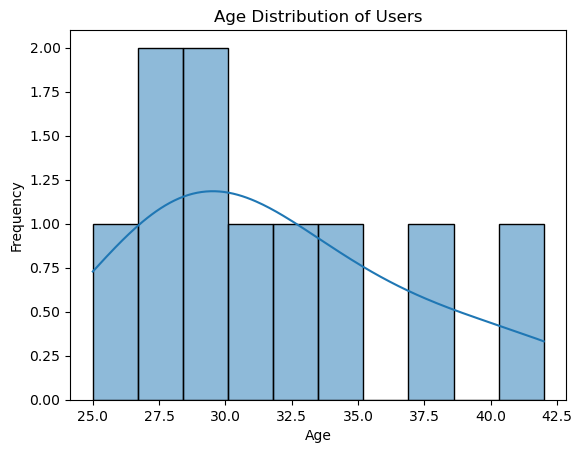

In [20]:
# Age Distribution
sns.histplot(user_details['age'], kde=True, bins=10)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [63]:
import numpy as np
mean_cooking_time = np.mean(merged_data['duration_(mins)'])  # Use the correct column name
print(f"Mean Duration(mins): {mean_cooking_time}")

# Identify outliers in cooking time
outliers = merged_data[merged_data['duration_(mins)'] > mean_cooking_time + 2 * np.std(merged_data['duration_(mins)'])]
print(outliers)

Mean Duration(mins): 29.342105263157894
Empty DataFrame
Columns: [user_id, user_name, age, location, registration_date, phone, email, favorite_meal, total_orders, session_id_x, dish_name, meal_type_x, session_start, session_end, duration_(mins), session_rating, order_id, order_date, meal_type_y, order_status, amount_(usd), time_of_day, rating, session_id_y]
Index: []

[0 rows x 24 columns]


In [64]:
print(merged_data['duration_(mins)'].head())
print(merged_data['duration_(mins)'].isnull().sum())

0    30
1    30
2    30
3    30
4    30
Name: duration_(mins), dtype: int64
0


In [49]:
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")

In [38]:
data.columns = data.columns.str.strip().str.replace(" ", "_")
print(data.columns)

Index(['User_ID', 'User_Name', 'Age', 'Location', 'Registration_Date', 'Phone',
       'Email', 'Favorite_Meal', 'Total_Orders'],
      dtype='object')


In [50]:
print("Cooking Sessions Data:")
print(cooking_sessions.head())

Cooking Sessions Data:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
2       S003    U003  Grilled Chicken     Dinner 2024-12-02 19:30:00   
3       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
4       S005    U004     Caesar Salad      Lunch 2024-12-03 13:00:00   

          Session End  Duration (mins)  Session Rating  
0 2024-12-01 19:30:00               30             4.5  
1 2024-12-01 12:20:00               20             4.0  
2 2024-12-02 20:10:00               40             4.8  
3 2024-12-02 08:00:00               30             4.2  
4 2024-12-03 13:15:00               15             4.7  


In [65]:
plt.savefig('popular_dishes.png')

<Figure size 640x480 with 0 Axes>

In [67]:
merged_data.to_csv('cleaned_data.csv', index=False)